In [3]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [4]:
file_path = 'archive (2)/data/train'

In [5]:
name_class = os.listdir(file_path)
name_class

['benign', 'malignant']

In [6]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [7]:
filepaths

['archive (2)/data/train\\benign\\100.jpg',
 'archive (2)/data/train\\benign\\1000.jpg',
 'archive (2)/data/train\\benign\\1001.jpg',
 'archive (2)/data/train\\benign\\1002.jpg',
 'archive (2)/data/train\\benign\\1004.jpg',
 'archive (2)/data/train\\benign\\1005.jpg',
 'archive (2)/data/train\\benign\\1007.jpg',
 'archive (2)/data/train\\benign\\1008.jpg',
 'archive (2)/data/train\\benign\\1009.jpg',
 'archive (2)/data/train\\benign\\101.jpg',
 'archive (2)/data/train\\benign\\1010.jpg',
 'archive (2)/data/train\\benign\\1011.jpg',
 'archive (2)/data/train\\benign\\1012.jpg',
 'archive (2)/data/train\\benign\\1014.jpg',
 'archive (2)/data/train\\benign\\1015.jpg',
 'archive (2)/data/train\\benign\\1016.jpg',
 'archive (2)/data/train\\benign\\1017.jpg',
 'archive (2)/data/train\\benign\\102.jpg',
 'archive (2)/data/train\\benign\\1020.jpg',
 'archive (2)/data/train\\benign\\1021.jpg',
 'archive (2)/data/train\\benign\\1022.jpg',
 'archive (2)/data/train\\benign\\1024.jpg',
 'archive (2)

In [8]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',

In [9]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,archive (2)/data/train\malignant\177.jpg,malignant
1,archive (2)/data/train\benign\817.jpg,benign
2,archive (2)/data/train\malignant\1158.jpg,malignant
3,archive (2)/data/train\benign\691.jpg,benign
4,archive (2)/data/train\benign\1370.jpg,benign


In [10]:
#balancing

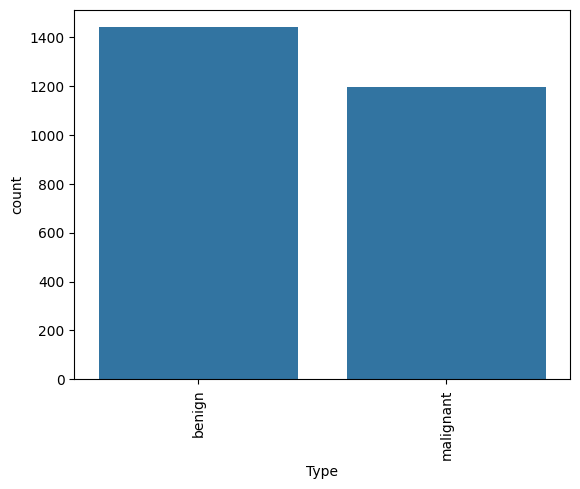

In [10]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [12]:
#balance by deleting extra images (Augmentor API)
#augmentation 
#GAN

In [11]:
total_samples = len(data)
malignant_count = data[data['Label'] == 'malignant'].shape[0]
benign_count = data[data['Label'] == 'benign'].shape[0]

In [12]:
print(f"Total Samples: {total_samples}")
print(f"Malignant Samples: {malignant_count}")
print(f"Benign Samples: {benign_count}")

Total Samples: 2637
Malignant Samples: 1197
Benign Samples: 1440


In [13]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

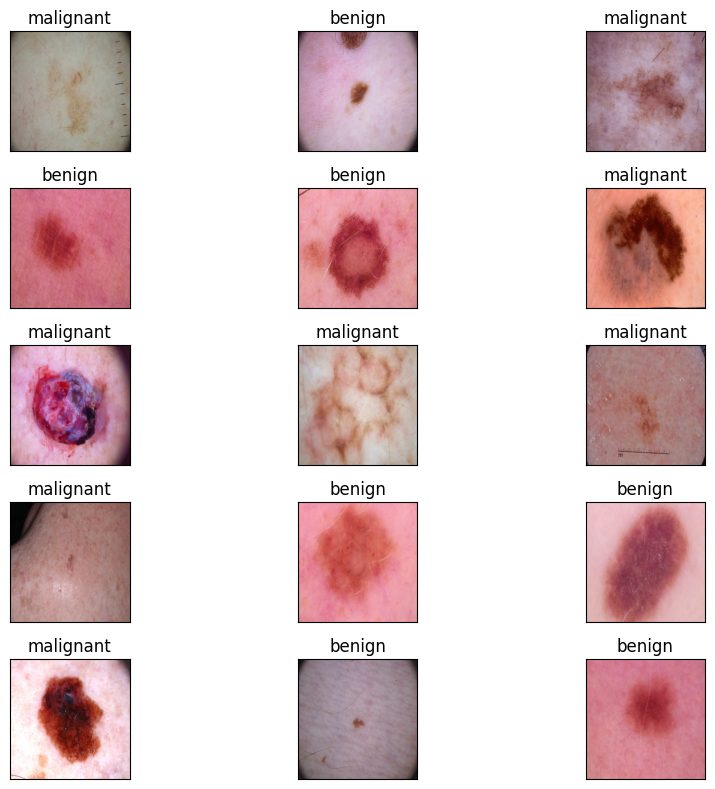

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [15]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [16]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1977 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.


In [17]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [18]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [21]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100
)

Epoch 1/100


62/62 [==============================] - 64s 934ms/step - loss: 0.3975 - accuracy: 0.8194 - val_loss: 0.4010 - val_accuracy: 0.8182
Epoch 2/100
62/62 [==============================] - 34s 546ms/step - loss: 0.2917 - accuracy: 0.8746 - val_loss: 0.3638 - val_accuracy: 0.8333
Epoch 3/100
62/62 [==============================] - 33s 531ms/step - loss: 0.2350 - accuracy: 0.8938 - val_loss: 0.3406 - val_accuracy: 0.8455
Epoch 4/100
62/62 [==============================] - 35s 558ms/step - loss: 0.2240 - accuracy: 0.8993 - val_loss: 0.3629 - val_accuracy: 0.8545
Epoch 5/100
62/62 [==============================] - 35s 558ms/step - loss: 0.1829 - accuracy: 0.9181 - val_loss: 0.3582 - val_accuracy: 0.8576
Epoch 6/100
62/62 [==============================] - 35s 563ms/step - loss: 0.1424 - accuracy: 0.9393 - val_loss: 0.4096 - val_accuracy: 0.8530
Epoch 7/100
62/62 [==============================] - 33s 533ms/step - loss: 0.1035 - accuracy: 0.9590 - val_loss: 0.4130 - val_accurac

In [29]:
model.save("model_SkinCancer.h5")  

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


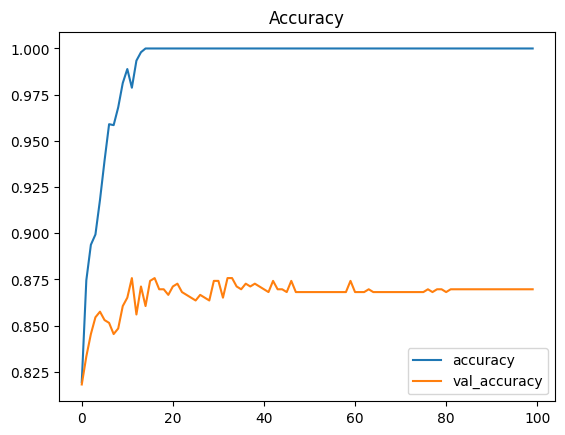

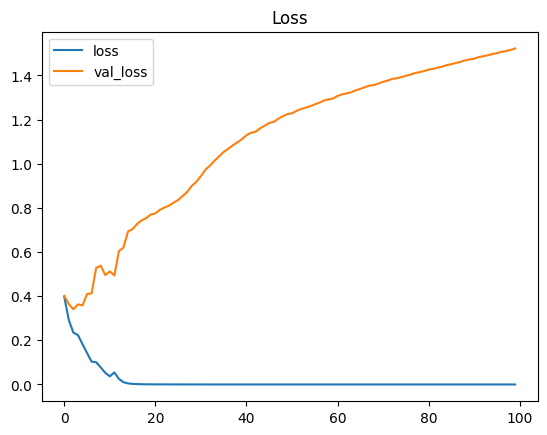

In [23]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [24]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 1.52224
Test Accuracy: 86.97%


In [25]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

21/21 [==============================] - 10s 419ms/step


In [26]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      benign       0.88      0.87      0.88       353
   malignant       0.85      0.87      0.86       307

    accuracy                           0.87       660
   macro avg       0.87      0.87      0.87       660
weighted avg       0.87      0.87      0.87       660



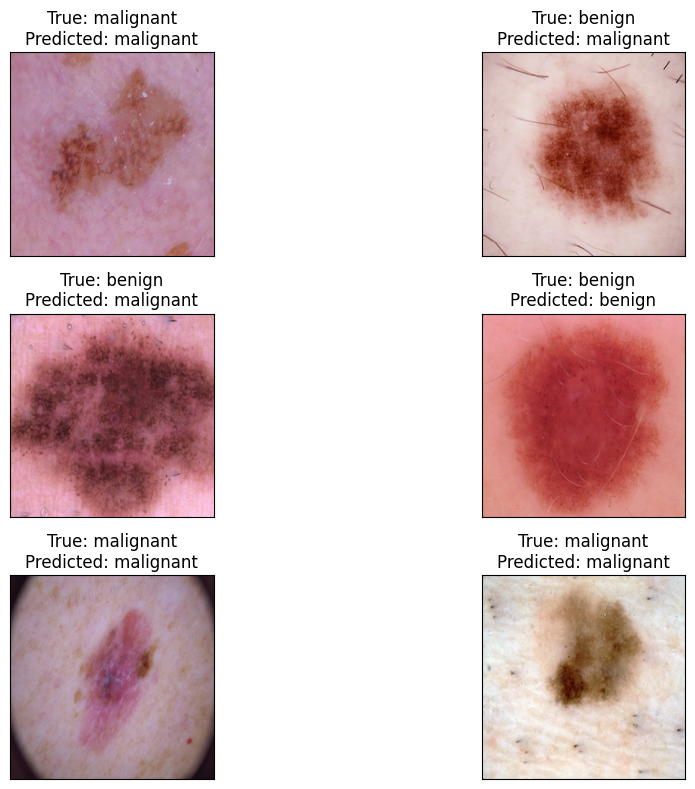

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()




1/1 [==============================] - 1s 1s/step


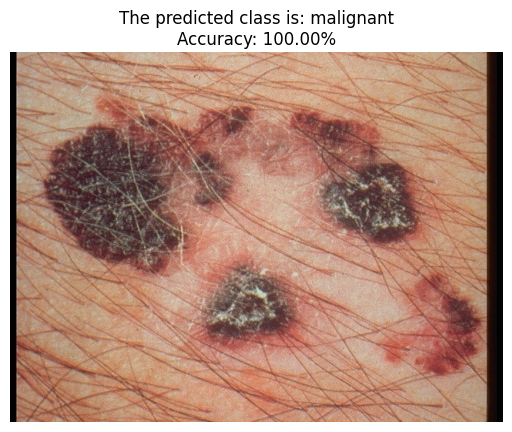

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the trained model
model = load_model("model_SkinCancer.h5")

# Define the path to the downloaded image
custom_image_path = "Skin_Cancer_Custom/Mai2.jpg"

# Function to classify custom input and display the image
def classify_and_display(custom_image_path):
    # Preprocess the input image
    img = image.load_img(custom_image_path, target_size=(100, 100))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make predictions
    predictions = model.predict(img_array)

    # Post-process predictions
    predicted_class_index = np.argmax(predictions)
    class_labels = {0: 'benign', 1: 'malignant'}
    predicted_class_label = class_labels[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    # Display the image and prediction details
    img = mpimg.imread(custom_image_path)
    plt.imshow(img)
    plt.title(f"The predicted class is: {predicted_class_label}\nAccuracy: {confidence:.2%}")
    plt.axis('off')
    plt.show()

# Classify and display the downloaded image
classify_and_display(custom_image_path)





    